In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

df=pd.read_csv('HW3_bike-sharing.csv')
len = df.shape[0]
pool = np.zeros((len,4))
multi = np.array([8765.82,720,24,1])
db=df.copy()

for index in range(len):
    x = (db.at[index,'datetime']).split(' ')
    y = x[0].split('/')
    pool[index][0] = int(y[0])-2011
    pool[index][1] = int(y[1])-1
    pool[index][2] = int(y[2])-1  
    k = x[1].split(':')  
    pool[index][3] = int(k[0])-0
    
res = pool*multi
for item in range(len):
    db.at[item,'datetime'] = sum(res[item])

將datetime欄位值，**<font color = blue>將第一筆資料(2011/1/1 00:00)設為0，其後每多一小時+1</font>**。

In [2]:
db.rename(columns={'count':'Count'},inplace=1)
y = db.Count
x = db.iloc[:,:-1]
#print(y)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

預測模型的target取dataframe的'count'欄位，但是**<font color = blue>跟panda.count()函式衝突</font>**。
因此先將'count'欄位改名為'Count'。

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lr = LinearRegression()
lr.fit(train_x, train_y)
predict_y = lr.predict(test_x)
mse = mean_squared_error(test_y, predict_y)
score = r2_score(test_y, predict_y)
print("linear regression預測模型MSE誤差值 = ",mse)
print("linear regression預測模型準確度 = ",score*(100),"%",sep='')

linear regression預測模型MSE誤差值 =  22259.052864053207
linear regression預測模型準確度 = 32.56249851525392%


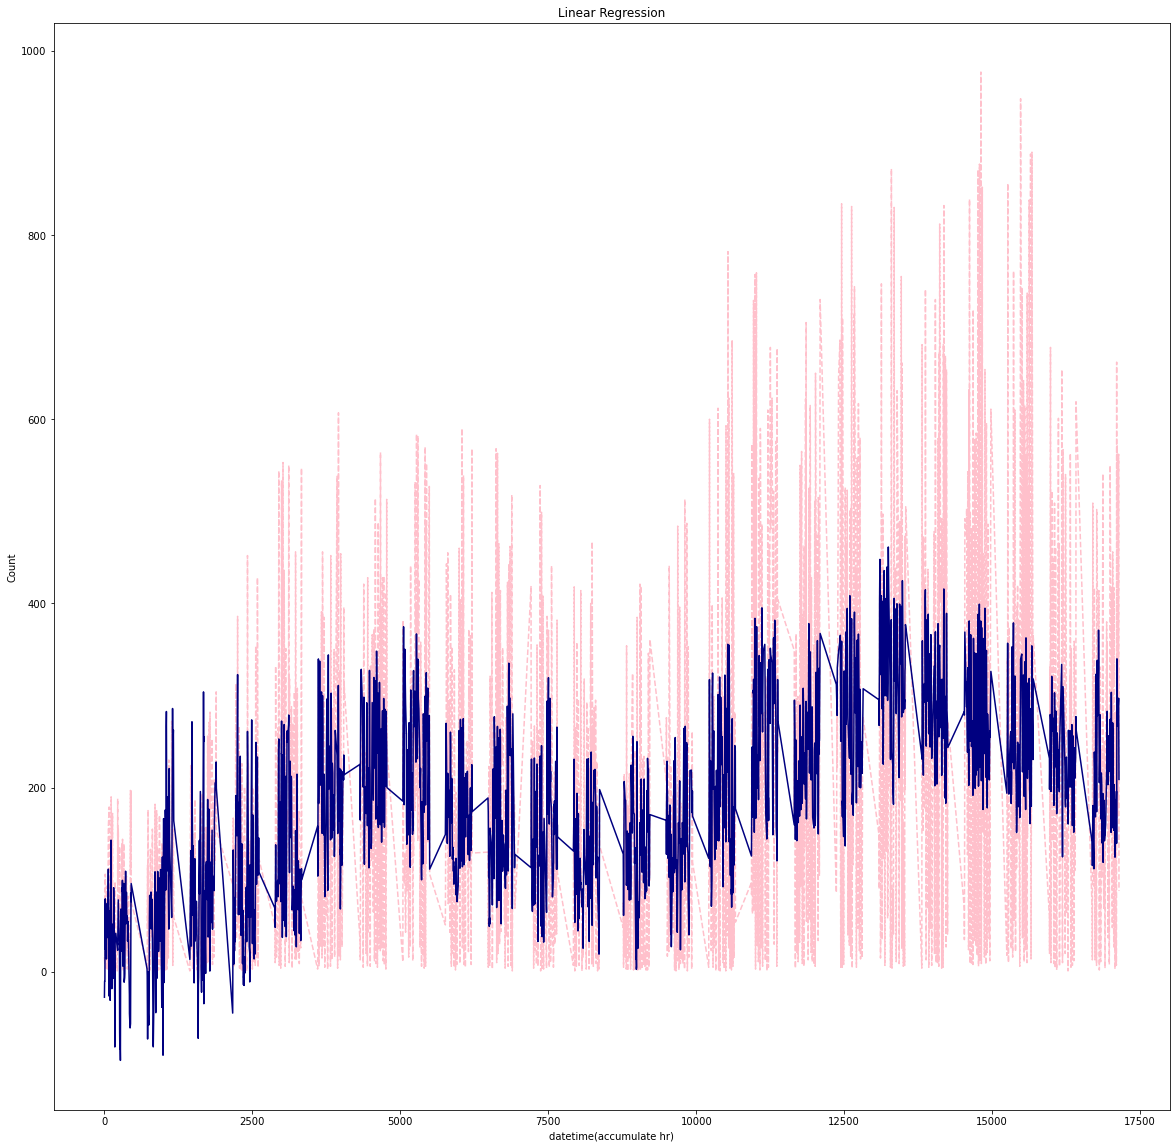

In [41]:
import matplotlib.pyplot as plt  

num = [x for x in range(test_x.shape[0])]
test_x.index = num
p = test_x['datetime'].sort_values()
p.index = num

r = predict_y
r2 = r.copy()
for i in range(r2.shape[0]):
    tmp = test_x[ ( test_x['datetime'] == p[i] ) ].index[0]
    r2[i] = r[tmp]
    
t = test_y
t.reset_index
t2 = t.copy()
t2.index = num
for i in range(t2.shape[0]):
    tmp = test_x[ ( test_x['datetime'] == p[i] ) ].index[0]
    t2[i] = t[tmp]

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,1,1)

plt.xlabel('datetime(accumulate hr)')
plt.ylabel('Count')
plt.title('Linear Regression')
plt.plot(p,t2,c='pink',linestyle='dashed')
plt.plot(p,r2,c='navy')
plt.show()

由MSE和r2_score，可以得知這次的預測模型，一如往常的低準確度。<br>
我們將實際結果與預測結果，以折線圖來表示。<br>
**<font color = green>藍色實線:預測</font>**； **<font color = green>粉色虛線:實際</font>**。<br>
可以推估這次的模型對於features的變化**<font color = red>"太不靈敏"</font>**，導致預測值和實際有很大的落差。
我們需要對於features變化更靈敏的預測模型。<br>